In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [3]:
#Carregando dataset
data = pd.read_excel("hoteis_tratados.xlsx")
data.columns = data.columns.str.lower()
data

,data_avaliacao,titulo,comentario_positivo,comentario_negativo,nota,hotel
0,2025-02-17,bom,A localização é perfeita e os funcionários são...,Da área de lazer que é pequena e sem uma vista...,10.0,Atlante_Plaza
1,2025-03-30,Pretenso vir oitras vezes,Atrndimento e conforto,Estacionamento pago,10.0,Atlante_Plaza
2,2025-03-29,Excepcional,"Foi excelente!! Tudo muito bom, os funcionário...",NaN,10.0,Atlante_Plaza
3,2025-03-29,Quero voltar!,"Funcionários bem treinados. Agradecemos, espec...",NaN,9.0,Atlante_Plaza
4,2025-03-27,Incrível,Excelente,NaN,10.0,Atlante_Plaza
...,...,...,...,...,...,...
72439,2024-12-28,Excepcional,NaN,NaN,10.0,Vela_Branca
72440,2024-08-14,Aceitável,NaN,NaN,5.0,Vela_Branca
72441,2024-04-12,Aceitável,NaN,NaN,5.0,Vela_Branca
72442,2024-03-26,Excepcional,NaN,NaN,10.0,Vela_Branca


In [4]:
#preenchendo valores NaN

data['nota'] = data['nota'].fillna("Nao informado")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72444 entries, 0 to 72443
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_avaliacao       72444 non-null  datetime64[ns]
 1   titulo               72444 non-null  object        
 2   comentario_positivo  34665 non-null  object        
 3   comentario_negativo  29024 non-null  object        
 4   nota                 72444 non-null  float64       
 5   hotel                72444 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 3.3+ MB


In [5]:
data['nota'].nunique()


16

C:\Users\TERRA\AppData\Local\Temp\ipykernel_23024\3743797117.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=nota_hotel, x='nota', y='hotel', palette='viridis')


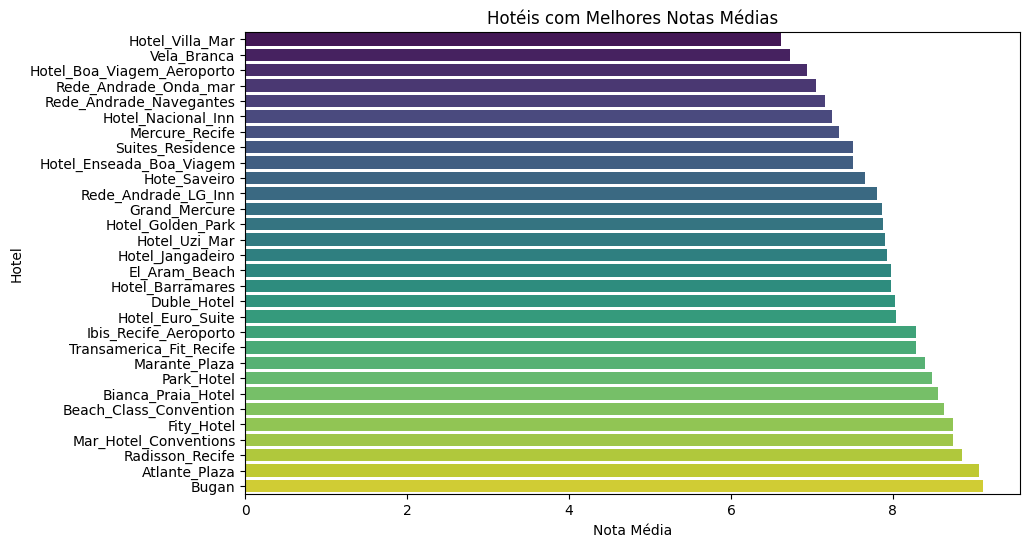

In [6]:
nota_hotel = data.groupby('hotel')['nota'].mean().sort_values().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=nota_hotel, x='nota', y='hotel', palette='viridis')
plt.title('Hotéis com Melhores Notas Médias')
plt.xlabel('Nota Média')
plt.ylabel('Hotel')
plt.show()

C:\Users\TERRA\AppData\Local\Temp\ipykernel_23024\1163290294.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comentario_hotel, x='comentario_positivo', y='hotel', palette='viridis')


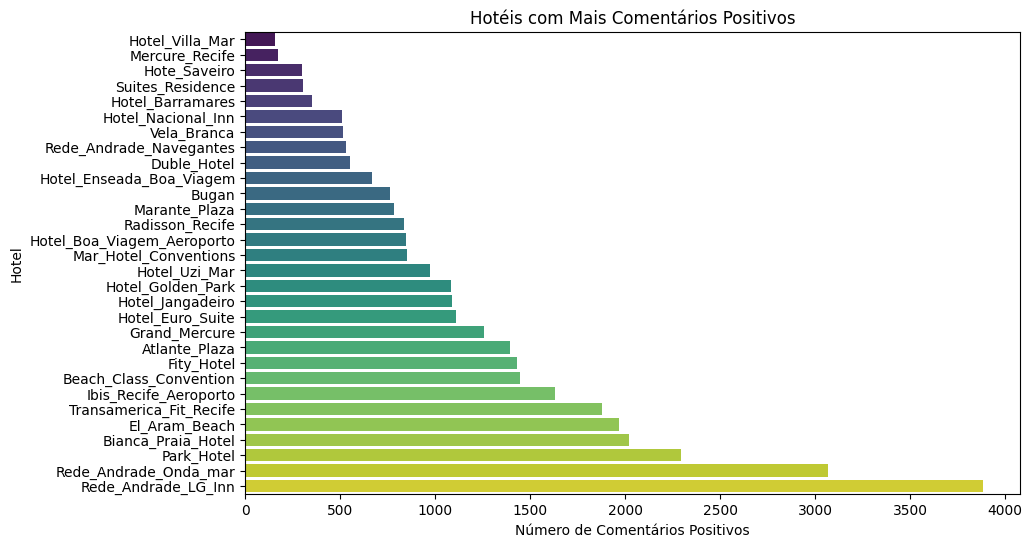

In [ ]:
comentario_hotel = data.groupby('hotel')['comentario_positivo'].count().sort_values().reset_index()

plt.figure(figsize=(10,6))sns.barplot(data=comentario_hotel, x='comentario_positivo', y='hotel', palette='viridis')
plt.title('Hotéis com Mais Comentários Positivos')
plt.xlabel('Número de Comentários Positivos')
plt.ylabel('Hotel')
plt.show()


C:\Users\TERRA\AppData\Local\Temp\ipykernel_23024\2275045648.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=negativo_hotel, x='comentario_negativo', y='hotel', palette='viridis')


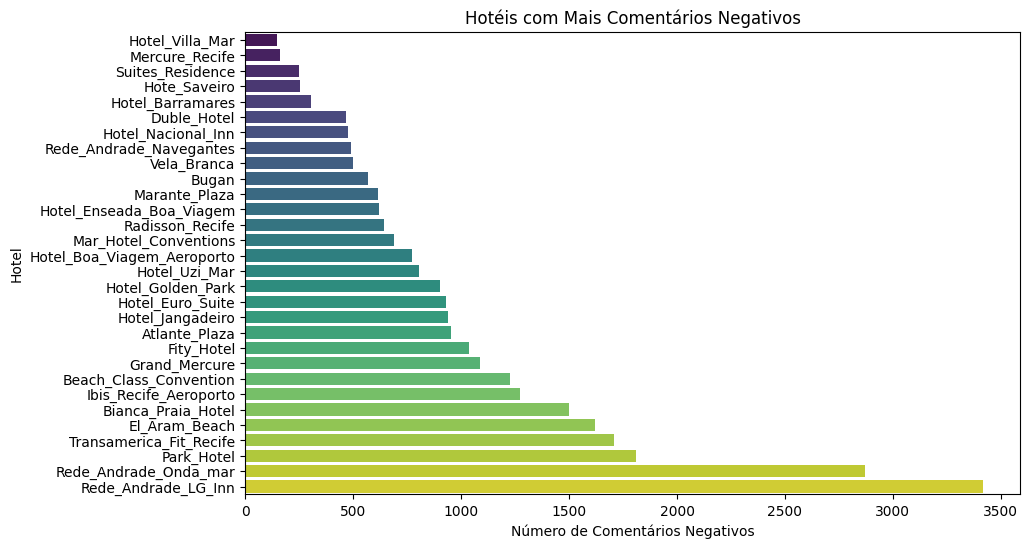

In [8]:
negativo_hotel = data.groupby('hotel')['comentario_negativo'].count().sort_values().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=negativo_hotel, x='comentario_negativo', y='hotel', palette='viridis')
plt.title('Hotéis com Mais Comentários Negativos')
plt.xlabel('Número de Comentários Negativos')
plt.ylabel('Hotel')
plt.show()

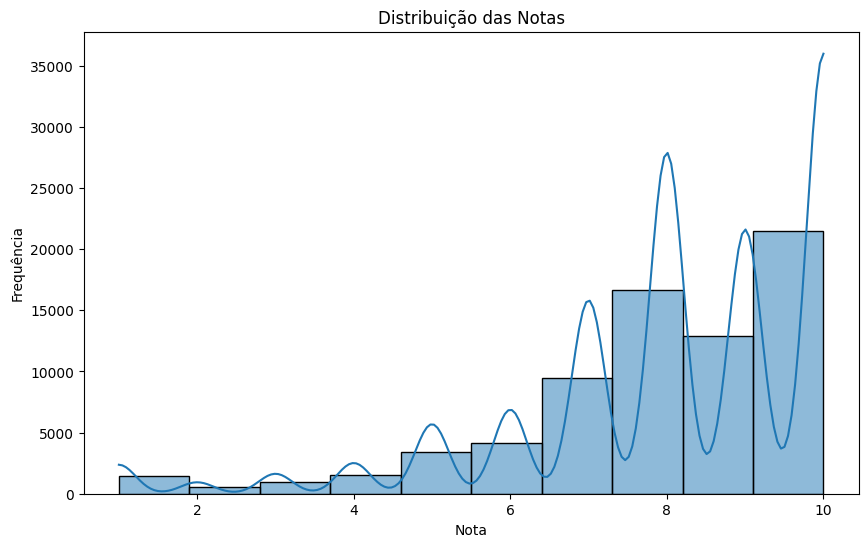

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['nota'], bins=10, kde=True)
plt.title('Distribuição das Notas')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

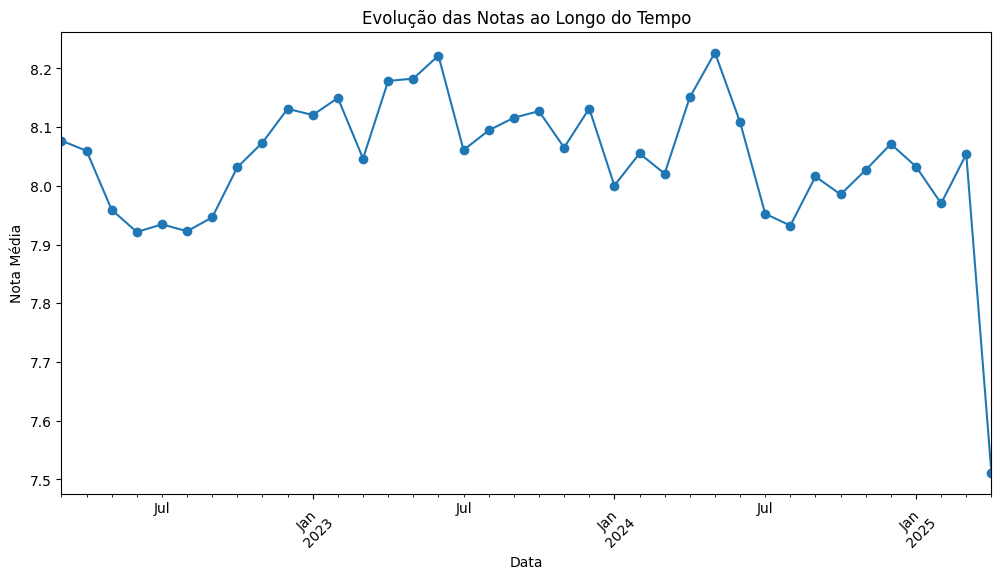

In [13]:
data['data_avaliacao'] = pd.to_datetime(data['data_avaliacao'])
data['mes_ano'] = data['data_avaliacao'].dt.to_period('M')
evolucao = data.groupby('mes_ano')['nota'].mean()
plt.figure(figsize=(12, 6))
evolucao.plot(marker='o')
plt.title('Evolução das Notas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Nota Média')
plt.xticks(rotation=45)
plt.show()

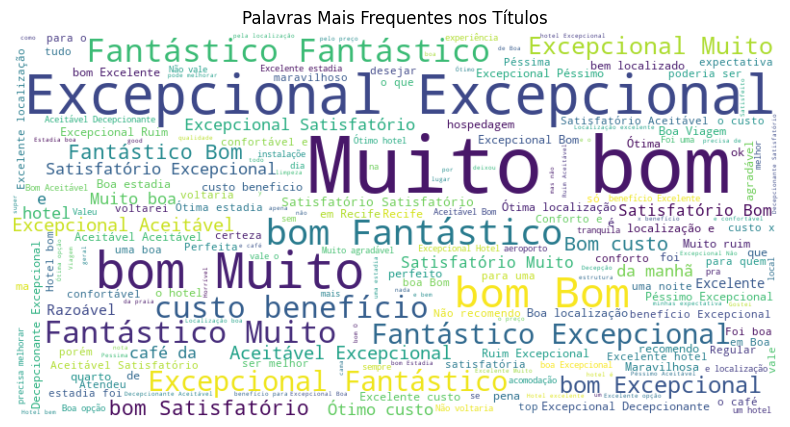

In [18]:
texto_positivo = ' '.join(data['titulo'].dropna().astype(str))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(texto_positivo)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras Mais Frequentes nos Títulos')
plt.show()




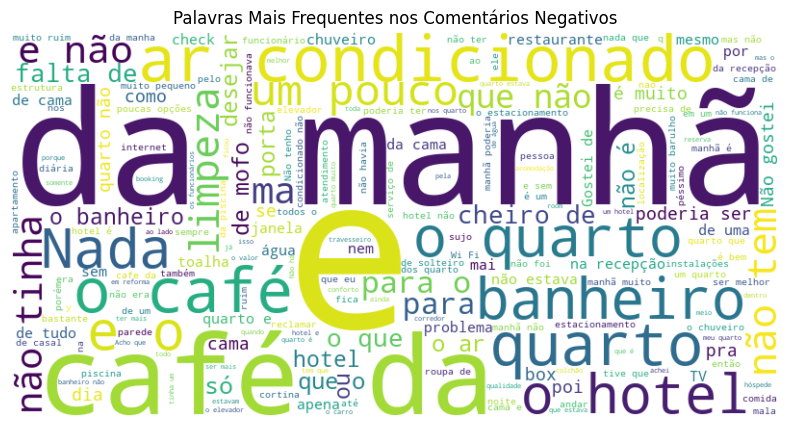

In [19]:
texto_negativo = ' '.join(data['comentario_negativo'].dropna().astype(str))
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(texto_negativo)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras Mais Frequentes nos Comentários Negativos')
plt.show()

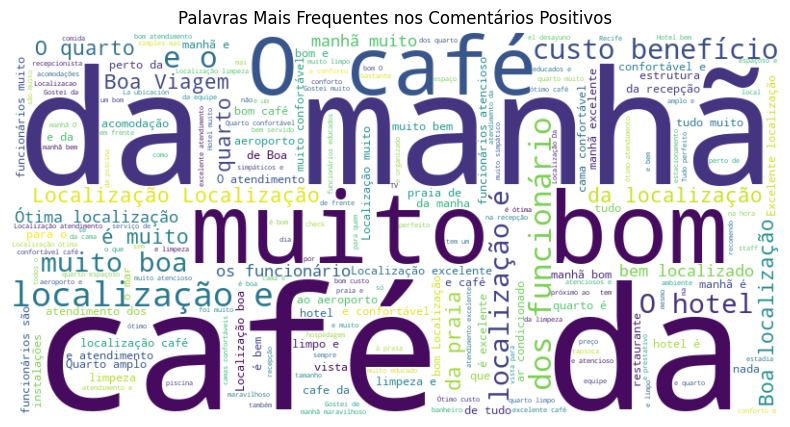

In [20]:
texto_positivo = ' '.join(data['comentario_positivo'].dropna().astype(str))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(texto_positivo)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras Mais Frequentes nos Comentários Positivos')
plt.show()

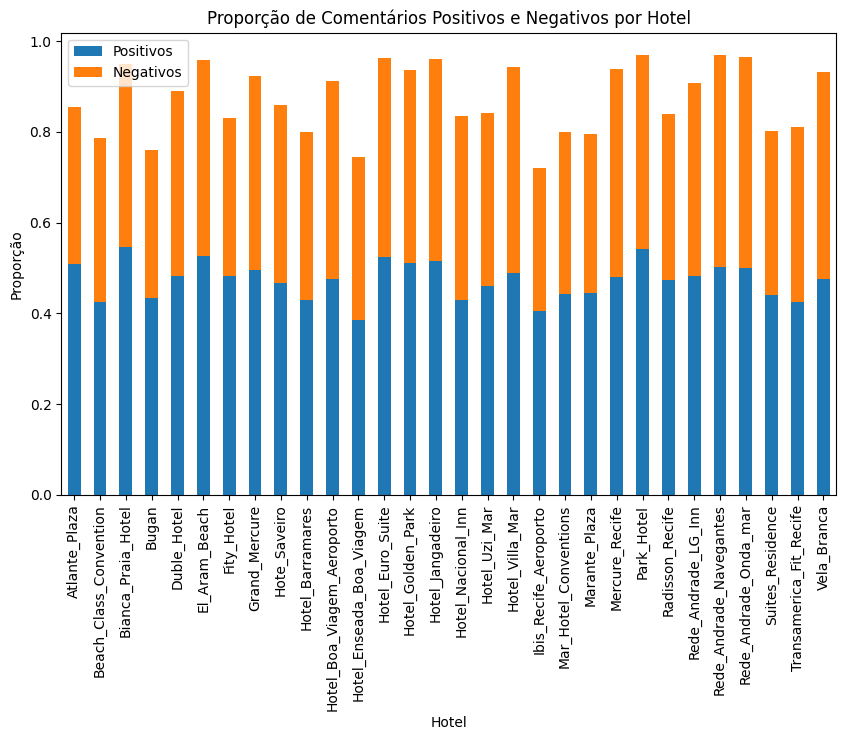

In [15]:
data['tem_positivo'] = data['comentario_positivo'].notnull()
data['tem_negativo'] = data['comentario_negativo'].notnull()
agrupado = data.groupby('hotel')[['tem_positivo', 'tem_negativo']].mean()

agrupado.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proporção de Comentários Positivos e Negativos por Hotel')
plt.ylabel('Proporção')
plt.xlabel('Hotel')
plt.legend(['Positivos', 'Negativos'])
plt.show()